In [1]:
import pandas as pd

In [2]:
from mlxtend.preprocessing import TransactionEncoder

In [3]:
from mlxtend.frequent_patterns import fpgrowth

In [4]:
from mlxtend.frequent_patterns import apriori

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from matplotlib.pyplot import figure

In [4]:
df = pd.read_csv("C:\L\CAP4770\project\Crime_Incidents - Crime_Incidents.csv")

In [3]:
crime = df.groupby(['Incident Type']).size()
#crime = crime.sort_values(ascending = False)
crime

Incident Type
Affray                                              306
Aircraft Incident                                     6
Alcohol Beverage-possess by Person Under 21 Yoa       1
All Other Liquor Law Viol.                           44
Animal Attack                                       118
                                                   ... 
Violation of Temporary Injunction                   123
Warrant Arrest                                     3706
Weapons Violation                                   135
Weapons Violation (possessing/concealing)           281
Written Threat to Kill or Injure                     54
Length: 218, dtype: int64

In [30]:
df.to_csv(r'C:\L\CAP4770\project\Project_Data', index = False)

In [41]:
df = pd.read_csv("C:\L\CAP4770\project\cleandata.csv", index_col = False)
df.head()

,Unnamed: 0,Incident Type,Offense Hour of Day,Offense Day of Week,Address,Latitude,Longitude,Gainesville Police Districts,Day,Month,Year
0,0,Stalking (simple),10,Saturday,3800 BLK SW 34TH ST,29.618756,-82.372637,3.0,2,11,2019
1,1,Disturbance,9,Saturday,3800 BLK SW ARCHER RD,29.620465,-82.380355,12.0,2,11,2019
2,2,Suspicious Incident,21,Thursday,2000 BLK NW 20TH LN,29.669724,-82.348361,4.0,31,10,2019
3,3,Domestic Disturbance,11,Saturday,4400 BLK SW 20TH AVE,29.636340,-82.389375,12.0,2,11,2019
4,4,Theft Petit - Retail,12,Saturday,500 BLK N MAIN ST,29.655751,-82.325024,1.0,2,11,2019


In [42]:
df = df.drop(['Incident Type','Unnamed: 0'], axis=1)
df.head()

,Offense Hour of Day,Offense Day of Week,Address,Latitude,Longitude,Gainesville Police Districts,Day,Month,Year
0,10,Saturday,3800 BLK SW 34TH ST,29.618756,-82.372637,3.0,2,11,2019
1,9,Saturday,3800 BLK SW ARCHER RD,29.620465,-82.380355,12.0,2,11,2019
2,21,Thursday,2000 BLK NW 20TH LN,29.669724,-82.348361,4.0,31,10,2019
3,11,Saturday,4400 BLK SW 20TH AVE,29.636340,-82.389375,12.0,2,11,2019
4,12,Saturday,500 BLK N MAIN ST,29.655751,-82.325024,1.0,2,11,2019


In [43]:
def discTime(hr):
	if hr >= 0 and hr <= 7:
		return '0-7'
	if hr >= 8 and hr <= 15:
		return '8-15'
	if hr >= 16 and hr <= 23:
		return '16-23'

df['Time Interval'] = df.apply(
lambda row: discTime(row['Offense Hour of Day']), axis=1
)
df.head()

,Offense Hour of Day,Offense Day of Week,Address,Latitude,Longitude,Gainesville Police Districts,Day,Month,Year,Time Interval
0,10,Saturday,3800 BLK SW 34TH ST,29.618756,-82.372637,3.0,2,11,2019,8-15
1,9,Saturday,3800 BLK SW ARCHER RD,29.620465,-82.380355,12.0,2,11,2019,8-15
2,21,Thursday,2000 BLK NW 20TH LN,29.669724,-82.348361,4.0,31,10,2019,16-23
3,11,Saturday,4400 BLK SW 20TH AVE,29.636340,-82.389375,12.0,2,11,2019,8-15
4,12,Saturday,500 BLK N MAIN ST,29.655751,-82.325024,1.0,2,11,2019,8-15


In [44]:
df = df.drop(['Offense Hour of Day'], axis=1)
df.head()

,Offense Day of Week,Address,Latitude,Longitude,Gainesville Police Districts,Day,Month,Year,Time Interval
0,Saturday,3800 BLK SW 34TH ST,29.618756,-82.372637,3.0,2,11,2019,8-15
1,Saturday,3800 BLK SW ARCHER RD,29.620465,-82.380355,12.0,2,11,2019,8-15
2,Thursday,2000 BLK NW 20TH LN,29.669724,-82.348361,4.0,31,10,2019,16-23
3,Saturday,4400 BLK SW 20TH AVE,29.636340,-82.389375,12.0,2,11,2019,8-15
4,Saturday,500 BLK N MAIN ST,29.655751,-82.325024,1.0,2,11,2019,8-15


In [11]:
def discTime(hr):
    if hr == '15-Aug':
        return '8-15'
    else:
        return hr

df['Time Interval'] = df.apply(
lambda row: discTime(row['Time Interval']), axis=1
)
df.head()

,Gainesville Police Districts,Time Interval,Report Day of Week
0,1,8-15,Tuesday
1,5,16-23,Tuesday
2,12,16-23,Tuesday
3,10,16-23,Tuesday
4,4,8-15,Tuesday


In [45]:
df['Gainesville Police Districts'] = df['Gainesville Police Districts'].astype(str)
df['Time Interval'] = df['Time Interval'].astype(str)
df['Address'] = df['Address'].astype(str)
df['Offense Day of Week'] = df['Offense Day of Week'].astype(str)
df['Latitude'] = df['Latitude'].astype(str)
df['Longitude'] = df['Longitude'].astype(str)
df['Day'] = df['Day'].astype(str)
df['Month'] = df['Month'].astype(str)
df['Year'] = df['Year'].astype(str)
dataset = df.values.tolist()
dataset

[['Saturday',
  '3800 BLK SW 34TH ST',
  '29.618756',
  '-82.372637',
  '3.0',
  '2',
  '11',
  '2019',
  '8-15'],
 ['Saturday',
  '3800 BLK SW ARCHER RD',
  '29.620465000000006',
  '-82.38035500000002',
  '12.0',
  '2',
  '11',
  '2019',
  '8-15'],
 ['Thursday',
  '2000 BLK NW 20TH LN',
  '29.669724',
  '-82.348361',
  '4.0',
  '31',
  '10',
  '2019',
  '16-23'],
 ['Saturday',
  '4400 BLK SW 20TH AVE',
  '29.63634',
  '-82.389375',
  '12.0',
  '2',
  '11',
  '2019',
  '8-15'],
 ['Saturday',
  '500 BLK N MAIN ST',
  '29.655751',
  '-82.325024',
  '1.0',
  '2',
  '11',
  '2019',
  '8-15'],
 ['Monday',
  '1500 BLK SW ARCHER RD',
  '29.639782',
  '-82.341761',
  '3.0',
  '1',
  '7',
  '2019',
  '0-7'],
 ['Saturday',
  '3500 BLK SW 20TH AVE',
  '29.634198',
  '-82.373635',
  '12.0',
  '2',
  '11',
  '2019',
  '8-15'],
 ['Saturday',
  '100 BLK SE 20TH ST',
  '29.65124',
  '-82.299092',
  '2.0',
  '2',
  '11',
  '2019',
  '8-15'],
 ['Friday',
  '1100 BLK E UNIVERSITY AVE',
  '29.651993',
  '

In [46]:
df.dtypes

Offense Day of Week             object
Address                         object
Latitude                        object
Longitude                       object
Gainesville Police Districts    object
Day                             object
Month                           object
Year                            object
Time Interval                   object
dtype: object

In [47]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [56]:
%%time
fs = pd.DataFrame(te_ary, columns=te.columns_)
result = fpgrowth(fs, min_support=0.0001, use_colnames=True, max_len = 9)

Wall time: 1min 41s


In [57]:
result = result.sort_values(by=['support'], ascending=False)

In [51]:
result.dtypes

support     float64
itemsets     object
dtype: object

In [70]:
result.head(50)

,support,itemsets
13,0.389506,(16-23)
0,0.357489,(8-15)
24,0.255188,(1.0)
28,0.253005,(0-7)
38,0.208882,(2.0)
39,0.157778,(Friday)
14,0.148893,(Thursday)
111,0.144148,(Wednesday)
1,0.142405,(Saturday)
82,0.141972,(Tuesday)


In [86]:
result2 =  result[result['itemsets'].map(len) > 1]
result2.head(20)

,support,itemsets
18028,0.089590,"(1.0, 16-23)"
21465,0.088053,"(16-23, 2.0)"
18027,0.084313,"(8-15, 1.0)"
18060,0.081285,"(1.0, 0-7)"
21464,0.077112,"(8-15, 2.0)"
21469,0.062897,"(16-23, Friday)"
14439,0.057633,"(Thursday, 16-23)"
4622,0.057280,"(Saturday, 16-23)"
14440,0.056768,"(8-15, Thursday)"
51484,0.055783,"(Wednesday, 16-23)"


In [84]:
result3 =  result[result['itemsets'].map(len) > 5]
result3.head(20)

,support,itemsets
105890,0.001704,"(Saturday, 29.661941, 1800 BLK NE 12TH AVE, 2...."
107076,0.001630,"(29.661941, 8-15, 1800 BLK NE 12TH AVE, Sunday..."
108007,0.001611,"(29.661941, 1800 BLK NE 12TH AVE, 2.0, Friday,..."
107370,0.001557,"(29.661941, 8-15, 1800 BLK NE 12TH AVE, 2.0, M..."
60041,0.001464,"(Saturday, 0-7, 29.652088, 1.0, -82.344748, 17..."
109247,0.001444,"(29.661941, 8-15, 1800 BLK NE 12TH AVE, 2.0, W..."
105883,0.001424,"(Saturday, 29.661941, 8-15, 1800 BLK NE 12TH A..."
108777,0.001371,"(29.661941, 8-15, 1800 BLK NE 12TH AVE, Tuesda..."
117109,0.001358,"(-82.38502199999998, 2900 BLK SW 42ND ST, 16-2..."
108364,0.001351,"(29.661941, 8-15, 1800 BLK NE 12TH AVE, 2.0, T..."


In [19]:
#result2 =  result[result['itemsets'].map(len) > 3].copy()
#result2.head(20)

In [74]:
result2 = result3.copy()
result2['itemsets'] = result2['itemsets'].astype(str)

In [33]:
result2

,support,itemsets
299,0.014306,"frozenset({'1', '0-7', 'Sunday'})"
276,0.014232,"frozenset({'1', '8-15', 'Thursday'})"
261,0.014105,"frozenset({'Saturday', '1', '0-7'})"
30,0.013868,"frozenset({'1', '8-15', 'Tuesday'})"
318,0.013623,"frozenset({'1', '16-23', 'Friday'})"
...,...,...
332,0.000119,"frozenset({'8', '8-15', 'Thursday'})"
333,0.000119,"frozenset({'8', 'Thursday', '16-23'})"
338,0.000111,"frozenset({'8', '0-7', 'Tuesday'})"
334,0.000111,"frozenset({'8', '0-7', 'Wednesday'})"


In [75]:
def cutStr(s):
        return (s[11:-2])

result2['itemsets'] = result2.apply(
lambda row: cutStr(row['itemsets']), axis=1
)
result2.head()

,support,itemsets
105890,0.001704,"'Saturday', '29.661941', '1800 BLK NE 12TH AVE..."
107076,0.001630,"'29.661941', '8-15', '1800 BLK NE 12TH AVE', '..."
108007,0.001611,"'29.661941', '1800 BLK NE 12TH AVE', '2.0', 'F..."
107370,0.001557,"'29.661941', '8-15', '1800 BLK NE 12TH AVE', '..."
60041,0.001464,"'Saturday', '0-7', '29.652088', '1.0', '-82.34..."


In [68]:
result2.head(20)

,support,itemsets
107354,0.009976,"'29.661941', '8-15', '1800 BLK NE 12TH AVE', '..."
107053,0.008964,"'29.661941', '1800 BLK NE 12TH AVE', '2.0', '1..."
79640,0.006036,"'6400 BLK W NEWBERRY RD', '10.0', '16-23', '29..."
80219,0.005690,"'8-15', '6400 BLK W NEWBERRY RD', '10.0', '29...."
40847,0.005670,"'-82.375208', '8-15', '29.624637', '3500 BLK S..."
60278,0.005138,"'0-7', '29.652088', '1.0', '-82.344748', '1700..."
41949,0.005118,"'-82.375208', '29.624637', '3500 BLK SW ARCHER..."
137115,0.004552,"'8-15', '-82.355728', '5700 BLK NW 23RD ST', '..."
136624,0.004419,"'-82.355728', '5700 BLK NW 23RD ST', '16-23', ..."
152791,0.003913,"'8-15', '1900 BLK NW 13TH ST', '29.668787', '4..."


In [76]:
temp = result2[0:10]
label = temp['itemsets'].tolist()
label

["'Saturday', '29.661941', '1800 BLK NE 12TH AVE', '2.0', '16-23', '-82.300747'",
 "'29.661941', '8-15', '1800 BLK NE 12TH AVE', 'Sunday', '2.0', '-82.300747'",
 "'29.661941', '1800 BLK NE 12TH AVE', '2.0', 'Friday', '16-23', '-82.300747'",
 "'29.661941', '8-15', '1800 BLK NE 12TH AVE', '2.0', 'Monday', '-82.300747'",
 "'Saturday', '0-7', '29.652088', '1.0', '-82.344748', '1700 BLK W UNIVERSITY AVE'",
 "'29.661941', '8-15', '1800 BLK NE 12TH AVE', '2.0', 'Wednesday', '-82.300747'",
 "'Saturday', '29.661941', '8-15', '1800 BLK NE 12TH AVE', '2.0', '-82.300747'",
 "'29.661941', '8-15', '1800 BLK NE 12TH AVE', 'Tuesday', '2.0', '-82.300747'",
 "'-82.38502199999998', '2900 BLK SW 42ND ST', '16-23', '29.627061', '2018', '12.0'",
 "'29.661941', '8-15', '1800 BLK NE 12TH AVE', '2.0', 'Thursday', '-82.300747'"]

In [77]:
from textwrap import wrap
label = [ '\n'.join(wrap(l, 15)) for l in label ]

In [78]:
label

["'Saturday',\n'29.661941',\n'1800 BLK NE\n12TH AVE',\n'2.0', '16-23',\n'-82.300747'",
 "'29.661941',\n'8-15', '1800\nBLK NE 12TH\nAVE', 'Sunday',\n'2.0',\n'-82.300747'",
 "'29.661941',\n'1800 BLK NE\n12TH AVE',\n'2.0',\n'Friday',\n'16-23',\n'-82.300747'",
 "'29.661941',\n'8-15', '1800\nBLK NE 12TH\nAVE', '2.0',\n'Monday',\n'-82.300747'",
 "'Saturday',\n'0-7',\n'29.652088',\n'1.0',\n'-82.344748',\n'1700 BLK W\nUNIVERSITY AVE'",
 "'29.661941',\n'8-15', '1800\nBLK NE 12TH\nAVE', '2.0',\n'Wednesday',\n'-82.300747'",
 "'Saturday',\n'29.661941',\n'8-15', '1800\nBLK NE 12TH\nAVE', '2.0',\n'-82.300747'",
 "'29.661941',\n'8-15', '1800\nBLK NE 12TH\nAVE',\n'Tuesday',\n'2.0',\n'-82.300747'",
 "'-82.3850219999\n9998', '2900\nBLK SW 42ND\nST', '16-23',\n'29.627061',\n'2018', '12.0'",
 "'29.661941',\n'8-15', '1800\nBLK NE 12TH\nAVE', '2.0',\n'Thursday',\n'-82.300747'"]

In [79]:
sp = temp['support'].tolist()

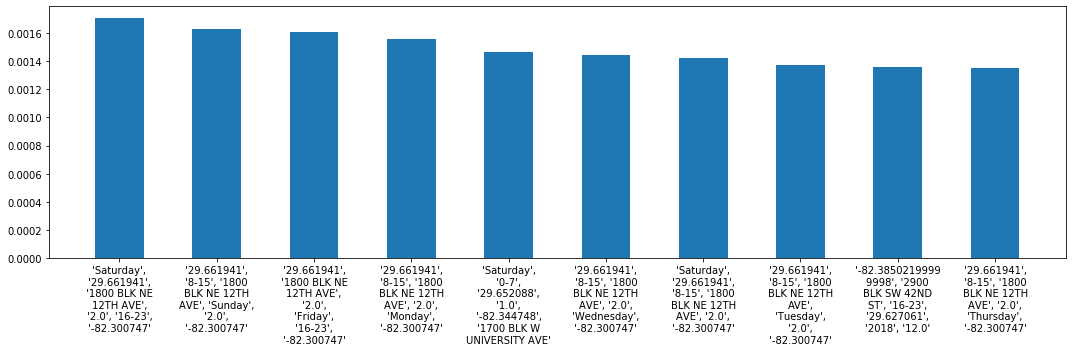

In [81]:
x = np.arange(10)
new_x = [3*i for i in x]
#fig, ax = plt.subplots()
#ax.set_xticks(new_x)
#ax.set_xticklabels(label)

plt.figure(figsize=(15, 5))
plt.xticks(new_x, label)
plt.bar( new_x,sp, align='center',width = 1.5)
plt.tight_layout()
plt.show()

In [29]:
plt.savefig('C:\L\CAP4770\project\FP_1')

<Figure size 432x288 with 0 Axes>